# Titanic Data

Now, armed with the knowledge of Pandas, let's try to work on the titanic data set!

In [56]:
%matplotlib inline

import pandas as pd

Imagine we are one of the passengers on the titanic and we have hit the ice berg. What's our chance of surviving?

Let's use our code to calculate the probability of different data points and use it against ourselves. In this first example, let's calculate the probability of people surviving based on gender, and see whether we have a higer chance of suriving.

First, let's read in the data set.

In [57]:
dataset = pd.read_csv('data/titanic.csv')

We are concerned with the column of "Survived". This value is the decision factor in our data analysis. Let's filter out the rows of people who survived.

In [58]:
dataset[dataset["Survived"] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We are going to focus on the gender of the value sets. So let's pull out the value we need.

In [59]:
dataset[dataset["Survived"] == 1]["Sex"]

1      female
2      female
3      female
8      female
9      female
10     female
11     female
15     female
17       male
19     female
21       male
22     female
23       male
25     female
28     female
31     female
32     female
36       male
39     female
43     female
44     female
47     female
52     female
53     female
55       male
56     female
58     female
61     female
65       male
66     female
        ...  
809    female
820    female
821      male
823    female
827      male
828      male
829    female
830    female
831      male
835    female
838      male
839      male
842    female
849    female
853    female
855    female
856    female
857      male
858    female
862    female
865    female
866    female
869      male
871    female
874    female
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

Use value_counts() method to give us a sum of the people who survived, broken down by gender.

In [60]:
survived_gender = dataset[dataset["Survived"] == 1]["Sex"].value_counts()
survived_gender

female    233
male      109
Name: Sex, dtype: int64

Let's also look at the people who did not survive, brokendown by gender.

In [61]:
died_gender = dataset[dataset["Survived"] == 0]["Sex"].value_counts()
died_gender

male      468
female     81
Name: Sex, dtype: int64

Let's create a new data frame with the two new values. i.e work on a new table.

In [62]:
survival_gen = pd.DataFrame([survived_gender,died_gender])

The names of the rows are very confusing, let's change them up! Recall we can do so by assigning index.

In [63]:
survival_gen.index = ["Survived", "Died"]
survival_gen

,female,male
Survived,233,109
Died,81,468


Let's visualise the data better.

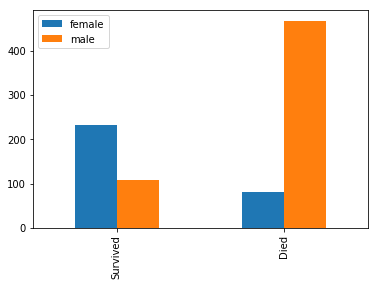

In [64]:
survival_gen.plot(kind="bar")

To get the probability of survival of a female, it's using the number of females who survived divided by the total number of females.

In [65]:
fsur = survival_gen["female"]["Survived"]
totalf = survival_gen["female"].sum()

probfsur = fsur / totalf * 100
probfsur

74.20382165605095

Let's do the same for males. You can express all in one line too.

In [66]:
probmsur = survival_gen["male"]["Survived"] / survival_gen["male"].sum() * 100
probmsur

18.890814558058924

Printing out the results.

In [67]:
print("Female survival probability: {}%".format(round(probfsur, 2)))
print("Male survival probability: {}%".format(round(probmsur, 2)))

Female survival probability: 74.2%
Male survival probability: 18.89%


## Calculate Probability for Embarking

Now that we understand the calculations for probability of surving given a gender, let's move a little faster. We will now focus on the Embarked column and calculate probability of survival based on where you embarked.

            S   C   Q
Survived  217  93  30
Died      427  75  47


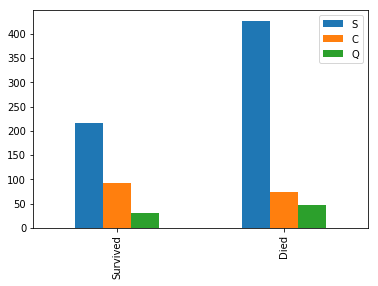

In [70]:
#value breakdown
s_embark = dataset[dataset["Survived"] == 1]["Embarked"].value_counts()
d_embark = dataset[dataset["Survived"] == 0]["Embarked"].value_counts()

#new df
df_embark = pd.DataFrame([s_embark, d_embark])

#change rowname
df_embark.index = ["Survived", "Died"]
print(df_embark)

#vis
df_embark.plot(kind="bar")

In [71]:
psurvives = df_embark["S"]["Survived"] / df_embark["S"].sum() * 100
psurvivec = df_embark["C"]["Survived"] / df_embark["C"].sum() * 100
psurviveq = df_embark["Q"]["Survived"] / df_embark["Q"].sum() * 100

print("Probability of suviving from Southampton; {}%".format(round(psurvives, 2)))
print("Probability of suviving from Cherbourg; {}%".format(round(psurvivec, 2)))
print("Probability of suviving from Queenstown; {}%".format(round(psurviveq, 2)))

Probability of suviving from Southampton; 33.7%
Probability of suviving from Cherbourg; 55.36%
Probability of suviving from Queenstown; 38.96%


## Prediction Time!

Assuming you are a female boarding from port Queenstown, what is your probability of surviving? We will need to 

In [72]:
(probfsur/100) * (psurviveq/100) * 100

28.91057986599388

This is not exactly correct, we will see more next lesson after we learn about conditional probability!